# Prototype Based Classification

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
FEATURE = 4096
CLASSES = 50
SEEN = 40
UNSEEN = 10

In [3]:
X_test = np.load('/home/bhavy/Dropbox/7th semester/courses/ML/Assignments/Assignment/hw1/Dataset-Q6/AwA_python/Xtest.npy', encoding = 'latin1')
Y_test=np.load('/home/bhavy/Dropbox/7th semester/courses/ML/Assignments/Assignment/hw1/Dataset-Q6/AwA_python/Ytest.npy', encoding = 'latin1')
X_seen = np.load('/home/bhavy/Dropbox/7th semester/courses/ML/Assignments/Assignment/hw1/Dataset-Q6/AwA_python/X_seen.npy', encoding = 'latin1')
class_attributes_seen=np.load('/home/bhavy/Dropbox/7th semester/courses/ML/Assignments/Assignment/hw1/Dataset-Q6/AwA_python/class_attributes_seen.npy', encoding = 'latin1')
class_attributes_unseen=np.load('/home/bhavy/Dropbox/7th semester/courses/ML/Assignments/Assignment/hw1/Dataset-Q6/AwA_python/class_attributes_unseen.npy', encoding = 'latin1')

In [4]:
class_attributes_seen.shape

(40, 85)

In [5]:
a = np.array([[1, 2, 3], [4, 5, 2]])
b = np.array([1, 2, 3])
#np.dot(b,a)
LA.norm(a -b, axis = 1)
np.argmin(a - b, axis=1)

array([0, 2])

In [6]:
def compute_mu(mu):
    for i in range(SEEN):
        single_class_data = X_seen[i]
        mu[i] = np.mean(single_class_data, axis = 0)

In [7]:
def compute_s(s):
    for i in range(UNSEEN):
        for j in range(SEEN):
            s[i][j] = np.dot(class_attributes_unseen[i], class_attributes_seen[j])

In [8]:
def normalize_s(s):
    for i in range(UNSEEN):
        s[i, :] = s[i, :]/s[i, :].sum()

In [9]:
def compute_unseen_mu(mu, s):
    for i in range(UNSEEN):
        mu[SEEN + i] = np.dot(s[i, :], mu[0:SEEN, :])

In [10]:
def prototype_prediction(X_test, mu):
    flag = np.zeros( ( X_test.shape[0], UNSEEN) )
    Y_pred = np.zeros(( X_test.shape[0], 1))
    for i in range(UNSEEN):
        flag[:, i] = LA.norm(X_test - mu[SEEN + i, :], axis =  1)
    Y_pred = np.argmin(flag, axis = 1)  +1
    return Y_pred

In [11]:
def accuracy(Y_pred, Y_test):
    return np.array(Y_pred  == Y_test, dtype=int).mean()

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
s = np.zeros((UNSEEN, SEEN))
mu = np.zeros((CLASSES, FEATURE) )
compute_mu(mu)
compute_s(s)
normalize_s(s)
compute_unseen_mu(mu, s)

In [14]:
Y_pred  = prototype_prediction(X_test, mu).reshape(X_test.shape[0], 1)

In [15]:
print ("Accuracy of prototype classifier is:", accuracy(Y_pred, Y_test)*100, "%" )

Accuracy of prototype classifier is: 46.89320388349515 %


Confusion matrix, without normalization
[[597   1  79  14   1   2   0   1   5   1]
 [  3  34  32  10   6 329   6 463  46  13]
 [  1   2 287 429   0   1   0   0   2   1]
 [  0   0   0 716   0   0   0   0   0   0]
 [  9   0   3   3 582   0   2   3   4   2]
 [  0   0   0   0   1  96   1  74 541   1]
 [  5  12 140  24   4  42  76   2  18   8]
 [  8   2   0   5  13   2   0 208 395   0]
 [  1   3   1   2   0  24   1   2 261   8]
 [  0   0   5 410   2  27   0   4  20  41]]


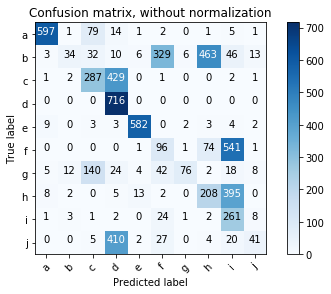

In [16]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')